Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


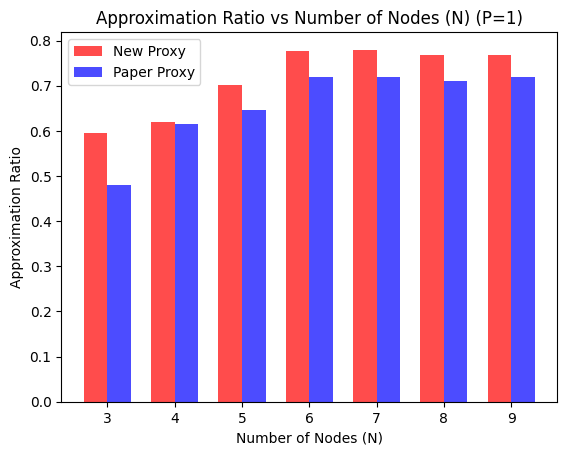

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import get_expectation, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp

# QAOAの層数
p = 1

# 各Nの近似比率を格納するリスト（各Nに対して10回の平均を格納）
approx_ratios_new_proxy = []
approx_ratios_paper_proxy = []

# Nを5から10まで変化させて計算
for N in range(3, 10):
    # 各Nについて10回の試行の近似比率を格納するリスト
    approx_ratios_new_proxy_i = []

    for _ in range(10):
        # エルデシュ・レーニイグラフの生成（ノード数N、エッジの確率0.5）
        G = nx.erdos_renyi_graph(N, 0.5)

        # グラフからIsingモデルの項を取得
        ising_model = mc.get_maxcut_terms(G)

        # シミュレーターの初期化
        sim = get_simulator(N, ising_model)

        # 初期のgammaとbetaを設定（全て0.1）
        init_gamma, init_beta = np.full((2, p), 0.1)

        # QAOAプロキシを使ってQAOAの実行（結果としてgammaとbetaを取得）
        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        gamma = result["gamma"]
        beta = result["beta"]

        # 得られたgammaとbetaで期待値を計算
        expectation = get_expectation(N, ising_model, gamma, beta)

        # シミュレーターからコスト対角成分の最大値を取得
        max_cost_diagonal = max(sim.get_cost_diagonal())

        # 近似比率（期待値/最大コスト対角成分）を計算
        approx_ratio = expectation / max_cost_diagonal

        # 結果をリストに追加
        approx_ratios_new_proxy_i.append(approx_ratio)

        # 各Nに対して10回の試行の平均を計算
    approx_ratios_new_proxy.append(np.mean(approx_ratios_new_proxy_i))



for N in range(3, 10):
    # 各Nについて10回の試行の近似比率を格納するリスト
    approx_ratios_paper_proxy_i = []

    for _ in range(10):       
    # QAOAプロキシ（論文版）を使ってQAOAの実行（結果としてgammaとbetaを取得）
        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        gamma = result["gamma"]
        beta = result["beta"]

        # 得られたgammaとbetaで期待値を計算
        expectation = get_expectation(N, ising_model, gamma, beta)

        # シミュレーターからコスト対角成分の最大値を取得
        max_cost_diagonal = max(sim.get_cost_diagonal())

        # 近似比率（期待値/最大コスト対角成分）を計算
        approx_ratio = expectation / max_cost_diagonal

        # 結果をリストに追加
        approx_ratios_paper_proxy_i.append(approx_ratio)

    # 各Nに対して10回の試行の平均を計算
    approx_ratios_paper_proxy.append(np.mean(approx_ratios_paper_proxy_i))

# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 10)  # x軸のインデックス

# 新しいプロキシの棒グラフ
plt.bar(index - bar_width / 2, approx_ratios_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy')

# 論文プロキシの棒グラフ
plt.bar(index + bar_width / 2, approx_ratios_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy')

# グラフの設定
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Approximation Ratio')
plt.title(f'Approximation Ratio vs Number of Nodes (N) (P={p})')
plt.xticks(index)  # x軸の目盛りを設定
plt.legend()

# グラフの表示
plt.show()


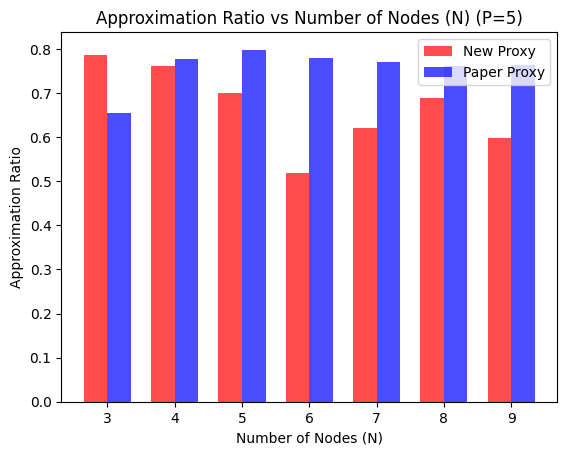

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import get_expectation, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp

# QAOAの層数
p = 5

# 各Nの近似比率を格納するリスト（各Nに対して10回の平均を格納）
approx_ratios_new_proxy = []
approx_ratios_paper_proxy = []

# Nを5から10まで変化させて計算
for N in range(3, 10):
    # 各Nについて10回の試行の近似比率を格納するリスト
    approx_ratios_new_proxy_i = []

    for _ in range(10):
        # エルデシュ・レーニイグラフの生成（ノード数N、エッジの確率0.5）
        G = nx.erdos_renyi_graph(N, 0.5)

        # グラフからIsingモデルの項を取得
        ising_model = mc.get_maxcut_terms(G)

        # シミュレーターの初期化
        sim = get_simulator(N, ising_model)

        # 初期のgammaとbetaを設定（全て0.1）
        init_gamma, init_beta = np.full((2, p), 0.1)

        # QAOAプロキシを使ってQAOAの実行（結果としてgammaとbetaを取得）
        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        gamma = result["gamma"]
        beta = result["beta"]

        # 得られたgammaとbetaで期待値を計算
        expectation = get_expectation(N, ising_model, gamma, beta)

        # シミュレーターからコスト対角成分の最大値を取得
        max_cost_diagonal = max(sim.get_cost_diagonal())

        # 近似比率（期待値/最大コスト対角成分）を計算
        approx_ratio = expectation / max_cost_diagonal

        # 結果をリストに追加
        approx_ratios_new_proxy_i.append(approx_ratio)

        # 各Nに対して10回の試行の平均を計算
    approx_ratios_new_proxy.append(np.mean(approx_ratios_new_proxy_i))



for N in range(3, 10):
    # 各Nについて10回の試行の近似比率を格納するリスト
    approx_ratios_paper_proxy_i = []

    for _ in range(10):       
    # QAOAプロキシ（論文版）を使ってQAOAの実行（結果としてgammaとbetaを取得）
        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        gamma = result["gamma"]
        beta = result["beta"]

        # 得られたgammaとbetaで期待値を計算
        expectation = get_expectation(N, ising_model, gamma, beta)

        # シミュレーターからコスト対角成分の最大値を取得
        max_cost_diagonal = max(sim.get_cost_diagonal())

        # 近似比率（期待値/最大コスト対角成分）を計算
        approx_ratio = expectation / max_cost_diagonal

        # 結果をリストに追加
        approx_ratios_paper_proxy_i.append(approx_ratio)

    # 各Nに対して10回の試行の平均を計算
    approx_ratios_paper_proxy.append(np.mean(approx_ratios_paper_proxy_i))

# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 10)  # x軸のインデックス

# 新しいプロキシの棒グラフ
plt.bar(index - bar_width / 2, approx_ratios_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy')

# 論文プロキシの棒グラフ
plt.bar(index + bar_width / 2, approx_ratios_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy')

# グラフの設定
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Approximation Ratio')
plt.title(f'Approximation Ratio vs Number of Nodes (N) (P={p})')
plt.xticks(index)  # x軸の目盛りを設定
plt.legend()

# グラフの表示
plt.show()